In [81]:
import numpy as np # <-- Import numpy to use arrays
import pandas as pd # <-- Import pandas to use dataframes
import matplotlib.pyplot as plt # <-- Import matplotlib to plot data

# Exercise 1 - Life cycle assessment of current electricity production

In this exercise, we will calculate the environmental impact of the current electricity production in a fictious country. We will consider the manufacturing and operation of different power plants, as well as the manufacturing of wind turbines and solar panels. We will also consider the treatment of waste from the manufacturing of these products. The environmental impact will be calculated using the ReCiPe method, which includes the following impact categories:

- Climate change
- Human toxicity
- Metals
- Water
- Fine particles emissions

The environmental impact will be calculated per unit of electricity produced by each technology. The results will be presented in stacked bar charts, with each bar representing the contribution of different activities to the total impact in each category.

### List of activities in the system (can also be found in emission_factors.csv)

Make a list called `activities` with the activities found in emission_factors.csv.

In [84]:
activities = [
    "steel",
    "concrete",
    "copper",
    "glass fibre reinforced plastic",
    "neodymium",
    "concrete waste treatment",
    "glass waste treatment",
    "silicone",
    "glass",
    "aluminium",
    "silver",
    "deionized water",
    "hard coal",
    "water",
    "natural gas"
]

## Add activities for manufacturing and operation of power plants

Add activities for the manufacturing and operation of the following power plants:

- Wind turbine
- Solar panel
- Hard coal power plant
- Natural gas power plant
- Hydropower plant

In [86]:
activities.extend(
    [f"{x} ({y})" 
    for y in ("build", "op") 
    for x in ("wind turbine", "solar panel", "hard coal power plant", "natural gas power plant", "hydro power plant",)
    ]
)

### Add activity for grid electricity

Add an activity for grid electricity to account for the environmental impact of the electricity consumed by the power plants during operation. Call it "grid electricity".

In [88]:
activities.append("grid electricity")

### Create a dictionary to map activities to indices in the matrix

Create a dictionary called `activities` that maps each activity to its index in the matrix. The index should correspond to the position of the activity in the `activities` list.

In [90]:
activities = {activity: i for i, activity in enumerate(activities)}

### For convenience, we create smaller dictionary for each type of activity

Create three dictionaries called `mat`, `build`, and `op` that contain the activities related to materials, manufacturing, and operation, respectively. The keys should be the names of the activities, and the values should be the corresponding indices in the `activities` list. These indices will be used to fill the matrix A with the coefficients of the system.

In [92]:
mat = {
    k: v for k, v in activities.items() if k in (
    "steel", "concrete", "copper", "glass fibre reinforced plastic", "neodymium", "concrete waste treatment", "glass waste treatment", "silicone", "glass",
    "aluminium", "silver", "deionized water", "hard coal", "water", "natural gas",
    )
}

build = {
    k: v for k, v in activities.items() if k in (
        "wind turbine (build)", "solar panel (build)", "hard coal power plant (build)", "natural gas power plant (build)", "hydro power plant (build)",
    )
}

op = {
    k: v for k, v in activities.items() if k in (
        "wind turbine (op)", "solar panel (op)", "hard coal power plant (op)", "natural gas power plant (op)", "hydro power plant (op)",
    )
}

grid = activities["grid electricity"]

### Create a dictionary to map direct emissions to indices in the B matrix

Create a dictionary called `direct` that maps each direct emission to its index in the B matrix. The index should correspond to the position of the emission in the list of direct emissions.

In [94]:
direct = {
    v: k for k, v in enumerate(
        (
            "CO2",
            "CH4",
            "N2O",
            "Tebuconazole",
            "Mercury",
            "Antimony",
            "Water",
            "PM 2.5",
            "PM 2.5-10",
            "PM 10",
        )
)
}

### Define the lifetime production of each power plant

Define the lifetime production of each power plant in kWh. The lifetime production is the total amount of electricity produced by the power plant over its lifetime, as described in the powerplants_data.md file. Store the values in a dictionary called `lifetime_production`, where the keys are the names of the power plants, and the values are the lifetime production in kWh.

In [96]:
lifetime_production = {
    'wind turbine': 900_000_000 * 20,
    'solar panel': 150_000_000 * 25,
    'coal power plant': 3_500_000_000 * 40,
    'natural gas power plant': 3_500_000_000 * 30,
    'hydro power plant': 4_380_000_000 * 50,
}

### Create a matrix A to represent the system, with ones on the diagonal

Create a square matrix A with dimensions equal to the number of activities, using `numpy.identity`. The matrix should have ones on the diagonal and zeros elsewhere. The matrix A will be used to calculate the impact of the system for each activity. Call the matrix `A`.

In [98]:
A=np.identity(len(activities))

### Load emission factors and characterization factors

Load the emission factors and characterization factors from the files `emission_factors.csv` and `characterization_factors.csv`, respectively. The emission factors contain the direct emissions to the environment for each activity, while the characterization factors contain the impact of these emissions on the environment. Load the data using `numpy.genfromtxt` and store the results in the variables `ef` and `cf`, respectively.

In [100]:
ef=np.genfromtxt(
    'emission_factors.csv',
    delimiter=',',
    skip_header=1,
    usecols=range(3, 13)
)

In [101]:
C=np.genfromtxt(
    'characterization_factors.csv',
    delimiter=',',
    skip_header=1,
    usecols=range(1, 6),
    filling_values=0,
)

### Create a matrix B and include the emission factors

Create a matrix B with dimensions equal to the number of activities and the number of direct emissions. Fill the matrix with the emission factors for each activity. The matrix B will be used to calculate the impact of the system for each direct emission. Call the matrix `B`.

In [103]:
B=np.zeros((len(activities), ef.shape[1]))

In [104]:
B[:ef.shape[0], :]=ef

### Fill the matrix A with instructions contained in powerplants_data.md
Input values must be negative, as they represent the consumption of
products from other activities. For example, if the manufacturing of a
wind turbine consumes 30,000 tons of steel, the corresponding entry in
the matrix A should be -30,000. The units of the values in the matrix A
should be consistent with the units of the values in the emission factors
and characterization factors (e.g., for steel, it is kilograms).

In [106]:
# Manufacturing of wind
A[mat['steel'], build['wind turbine (build)']] = -30000 * 1000 # tons
A[mat['concrete'], build['wind turbine (build)']] = -150000 * 1000 # tons
A[mat['copper'], build['wind turbine (build)']] = -1500 * 1000 # tons
A[mat['glass fibre reinforced plastic'], build['wind turbine (build)']] = -3000 * 1000 # tons
A[mat['neodymium'], build['wind turbine (build)']] = -30 * 1000  # tons
A[grid, build['wind turbine (build)']] = -4500 * 1000  # MWh to kWh
A[mat['concrete waste treatment'], build['wind turbine (build)']] = -120000 * 1000  # tons
A[mat['glass waste treatment'], build['wind turbine (build)']] = -3000 * 1000  # tons

# Manufacturing of PV
A[mat['silicone'], build['solar panel (build)']] = -5000 * 1000  # tons
A[mat['glass'], build['solar panel (build)']] = -10000  * 1000 # tons
A[mat['aluminium'], build['solar panel (build)']] = -2000  * 1000 # tons
A[mat['silver'], build['solar panel (build)']] = -100 * 1000 # tons
A[grid, build['solar panel (build)']] = -50000 * 1000  # MWh to kWh

# Manufacturing of coal
A[mat['steel'], build['hard coal power plant (build)']] = -100000 * 1000 # tons
A[mat['concrete'], build['hard coal power plant (build)']] = -250000 * 1000 # tons
A[mat['copper'], build['hard coal power plant (build)']] = -1000 * 1000 # tons
A[grid, build['hard coal power plant (build)']] = -10000 * 1000 # MWh to kWh

# Manufacturing of NG
A[mat['steel'], build['natural gas power plant (build)']] = -50000 * 1000 # tons
A[mat['concrete'], build['natural gas power plant (build)']] = -200000  # tons
A[mat['copper'], build['natural gas power plant (build)']] = -1500 * 1000 # tons
A[grid, build['natural gas power plant (build)']] = -10000 * 1000 # MWH to kWh

# Manufacturing of hydro
A[mat['steel'], build['hydro power plant (build)']] = -300000 * 1000 # tons
A[mat['concrete'], build['hydro power plant (build)']] = -1000000 * 1000 # tons
A[mat['copper'], build['hydro power plant (build)']] = -10000 * 1000 # tons
A[grid, build['hydro power plant (build)']] = -30000 * 1000 # MWh to kWh

# Operations consuming resources
A[mat['water'], op['solar panel (op)']] = -1 * 0.001  # L/kWh 
A[mat['hard coal'], op['hard coal power plant (op)']] = -0.3 # kg/kWh
A[mat['water'], op['hard coal power plant (op)']] = -2.5  # L/kWh
A[mat['natural gas'], op['natural gas power plant (op)']] = -0.15  # m³/kWh
A[mat['water'], op['natural gas power plant (op)']] = -1.2  # L/kWh
A[mat['water'], op['hydro power plant (op)']] = -2  # L/kWh

# Manufacturing input to operation
A[build['wind turbine (build)'], op['wind turbine (op)']] = -1 / lifetime_production['wind turbine']
A[build['solar panel (build)'], op['solar panel (op)']] = -1 / lifetime_production['solar panel']
A[build['hard coal power plant (build)'], op['hard coal power plant (op)']] = -1 / lifetime_production['coal power plant']
A[build['natural gas power plant (build)'], op['natural gas power plant (op)']] = -1 / lifetime_production['natural gas power plant']
A[build['hydro power plant (build)'], op['hydro power plant (op)']] = -1 / lifetime_production['hydro power plant']

# Grid electricity
A[op['hard coal power plant (op)'], grid] = -0.4
A[op['natural gas power plant (op)'], grid] = -0.3
A[op['hydro power plant (op)'], grid] = -0.2
A[op['wind turbine (op)'], grid] = -0.05
A[op['solar panel (op)'], grid] = -0.05

### Fill the matrix B with direct emissions to the environment

Fill the matrix B with the direct emissions to the environment for each powerplant. The direct emissions are given in the powerplant_data.md file. The matrix B will be used to calculate the impact of the system for each direct emission.

In [108]:
B[op['hard coal power plant (op)'], direct['CO2']]=0.820
B[op['natural gas power plant (op)'], direct['CO2']]=0.450
B[op['hydro power plant (op)'], direct['CH4']]=0.002

### Calculate the impact of the system, per technology and store the results in a list

$$
  A \cdot x = f
$$


  - $A$ is the **technology matrix**: a matrix that describes the relationship between processes in the system. Each element $ A_{ij} $ represents how much of product $ i $ is required to produce one unit of product $ j $.
  - $x$ is the **process vector**: the quantity of each process required to fulfill the functional unit.
  - $f$ is the **functional unit vector**, which typically defines the demand for the system output (e.g., how much of the functional unit needs to be produced).

- To solve for $x$, you may use `numpy.linalg.solve`.

- Once $x$ is determined, you can calculate the total environmental flows (inputs/outputs of the entire system).

### Environmental Flow Calculation

- The **inventory vector** $g$ is calculated as:

  $$
  g = B \cdot x
  $$

  - $ B $ is the **flow matrix**: it contains the environmental flows (e.g., energy, materials, emissions) for each process.
  - $ g $ is the vector of cumulative environmental flows (e.g., total emissions) over the entire life cycle.

You will need ensure that the shapes of the matrices allow proper broadcasting and matrix multiplication. You may need to transpose matrices or reshape vectors to ensure the correct shapes for multiplication.


### Life Cycle Impact Assessment (LCIA)
The LCIA phase involves translating the results of the LCI (i.e., the inventory of environmental flows) into potential environmental impacts. This requires the use of characterization factors to translate individual environmental flows into impact categories (e.g., climate change, ozone depletion, human toxicity).


The environmental impact is calculated using characterization factors:
$$
I=C⋅g
$$

- $C$ is the **characterization matrix**: a matrix that contains the characterization factors for each environmental flow and impact category.
- $I$ is the **impact vector**: the impact of the system on each impact category.
- $g$ is the **inventory vector**: the environmental flows (inputs/outputs) of the entire system.


In [110]:
scores = []
technologies = [
    "wind turbine (op)",
    "solar panel (op)",
    "hard coal power plant (op)",
    "natural gas power plant (op)",
    "hydro power plant (op)",
    "grid electricity",
]
for technology in technologies:
    f=np.zeros(len(activities))
    f[activities[technology]]=1
    x = np.linalg.solve(A, f)
    g = x*B.T
    I=(g.T@C)
    scores.append(I)

In [111]:
scores=np.stack(scores)

In [112]:
scores.shape

(6, 26, 5)

In [113]:
indicators = [
    "Climate change",
    "Human toxicity",
    "Metals",
    "Water",
    "Fine particle"
]
units = [
    "kg CO2 eq",
    "CTUh",
    "kg antimony eq",
    "m3 water",
    "kg PM 2.5 eq"
]

In [114]:
activities_colors = {
    "steel": "tab:red",
    "concrete": "tab:red",
    "copper": "tab:red",
    "glass fibre reinforced plastic": "tab:red",
    "neodymium": "tab:red",
    "silicone": "tab:red",
    "glass": "tab:red",
    "aluminium": "tab:red",
    "silver": "tab:red",
    "deionized water": "tab:red",
    "water": "tab:red",
    "hard coal": "tab:orange",
    "natural gas": "tab:orange",
    "concrete waste treatment": "tab:blue",
    "glass waste treatment": "tab:blue",
    'wind turbine (build)': "tab:brown",
    'solar panel (build)': "tab:brown",
    'hard coal power plant (build)': "tab:brown",
    'natural gas power plant (build)': "tab:brown",
    'hydro power plant (build)': "tab:brown",
    "wind turbine (op)": "tab:brown",
    "solar panel (op)": "tab:gray",
    "hard coal power plant (op)": "tab:gray",
    "natural gas power plant (op)": "tab:gray",
    "hydro power plant (op)": "tab:gray",
    "grid electricity": "tab:gray",
}

### Plot the results in stacked bar charts


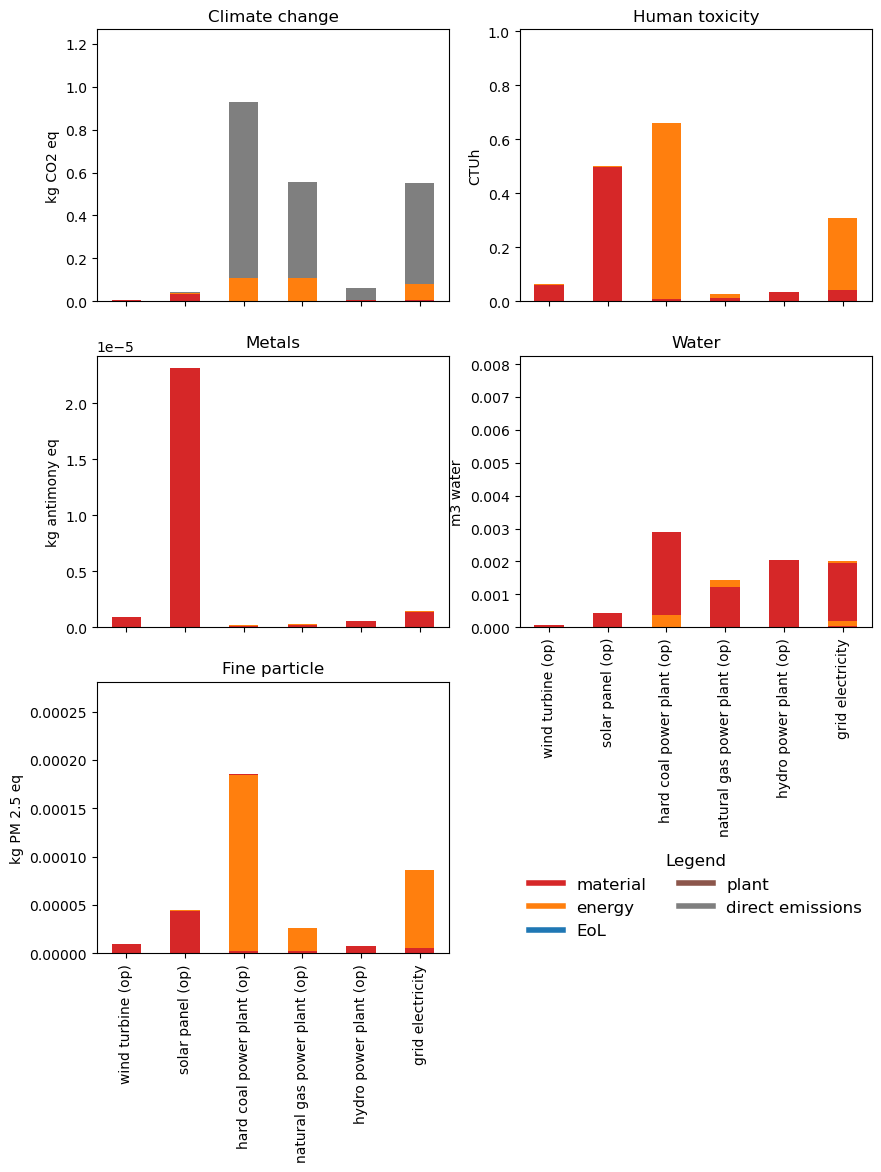

In [116]:
import matplotlib

colors = matplotlib.colormaps.get_cmap('tab20b', )
num_plots = scores.shape[2]
num_bars = scores.shape[0]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

axes = axes.flatten()

for i in range(num_plots):
    ax = axes[i]
    bottom = np.zeros(num_bars)

    pd.DataFrame(scores[..., i], index=technologies).plot(
        kind="bar", stacked=True, ax=ax, 
        color=[activities_colors[activity] for activity in activities],
        legend=False, bottom=bottom,
    )

    ax.set_title(f'{indicators[i]}')
    ax.set_ylabel(units[i])
    if i not in (3, 4):
        ax.set_xticklabels([])
    ax.set_ylim(0, max(scores[:, :, i].sum(0)) * 1.1)
    ax.legend().remove()
    


axes[-1].axis('off')

handles = ["material", "energy", "EoL", "plant", "direct emissions"]
colors = ["tab:red", "tab:orange", "tab:blue", "tab:brown", "tab:gray"]
labels = ["material", "energy", "EoL", "plant", "direct emissions"]
legend = [plt.Line2D([0], [0], color=colors[i], lw=4, label=labels[i]) for i in range(5)]
axes[-1].legend(handles=legend, loc='lower center', title='Legend', title_fontsize='large', fontsize='large', frameon=False, ncol=2)

plt.show()